In [2]:
import pandas as pd
import numpy as np
import sklearn
import os

In [30]:
path_ham : str = "C:/Users/Orefice/OneDrive/Bureau/IT/AI/easy_ham_2"
path_spam : str = "C:/Users/Orefice/OneDrive/Bureau/IT/AI/spam_2"

In [32]:
file_ham_list : list[str] = os.listdir("C:/Users/Orefice/OneDrive/Bureau/IT/AI/easy_ham_2")
file_spam_list : list[str] = os.listdir("C:/Users/Orefice/OneDrive/Bureau/IT/AI/spam_2")

In [33]:
with open("C:/Users/Orefice/OneDrive/Bureau/IT/AI/easy_ham_2/" + file_ham_list[0]) as f:
    l = f.read()
    print(l)

Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7106643C34
	for <jm@localhost>; Wed, 21 Aug 2002 08:33:03 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Wed, 21 Aug 2002 13:33:03 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LCXvZ24654 for
    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 13:33:57 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id F12A13EA25; Wed, 21 Aug 2002
    08:34:00 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org
    [172.16.52.254

In [34]:
for filename in file_ham_list[0]:
    file = path_ham + "/" + filename
    with open(file) as f:
        l = f.read()
        print(l)

Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7106643C34
	for <jm@localhost>; Wed, 21 Aug 2002 08:33:03 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Wed, 21 Aug 2002 13:33:03 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LCXvZ24654 for
    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 13:33:57 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id F12A13EA25; Wed, 21 Aug 2002
    08:34:00 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org
    [172.16.52.254

In [106]:
def read_files_contents(file_list : list[str] | str, path_file : str) -> list[str]:
    result : list[str] = []
    if isinstance(file_list, list) == True:
        for filename in file_list:
            file = path_file + "/" + filename
            with open(file, encoding = "latin-1") as f:
                result.append(f.read())
    elif isinstance(file_list, str) == True:
        file = path_file + "/" + file_list
        with open(file, encoding = "latin-1") as f:
            result = f.read()
    return result

print(read_files_contents(path_file = path_ham, file_list = file_ham_list))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [107]:
from sklearn.feature_extraction.text import CountVectorizer


vectorize = CountVectorizer()

In [122]:
ham_text = read_files_contents(path_file = path_ham, file_list = file_ham_list)
spam_text = read_files_contents(path_file = path_spam, file_list = file_spam_list)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
print(len(ham_text))
print(len(spam_text))

X = ham_text + spam_text
y = ["ham"]*1401 + ["spam"]* 1397



X_train = ham_text[0:1120] + spam_text[0:1117]
X_test = ham_text[1120:] + spam_text[1117:]
y_train = ["ham"]*1120 + ["spam"]*1117
y_test = ["ham"]* (1401 - 1120) + ["spam"]* (1397-1117)

1401
1397


In [124]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2237
561
2237
561


In [121]:
import random


random.seed(42)

combined_data_train = list(zip(X_train,y_train))
combined_data_test = list(zip(X_test,y_test))


random.shuffle(combined_data_train)
random.shuffle(combined_data_test)
X_train, y_train = zip(*combined_data_train)
X_test,y_test = zip(*combined_data_test)

In [125]:
vectorizer = CountVectorizer(encoding = "latin-1")
vectorizer.fit_transform(X_train)

<2237x72501 sparse matrix of type '<class 'numpy.int64'>'
	with 637748 stored elements in Compressed Sparse Row format>

In [127]:
from sklearn.linear_model import SGDClassifier


X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
clf = SGDClassifier(loss="hinge")
clf.fit(X_train_transformed, y_train)

SGDClassifier()

In [130]:
y_pred = clf.predict(X_test_transformed)

In [131]:
from sklearn.metrics import accuracy_score


accuracy_score(y_pred,y_test)

0.9055258467023173

In [132]:
from sklearn.metrics import recall_score, precision_score

In [135]:
print(f"recall score: {recall_score(y_pred,y_test, pos_label = 'spam')}")
print(f"preicision score: {precision_score(y_pred,y_test, pos_label = 'spam')}")

recall score: 0.9097472924187726
preicision score: 0.9


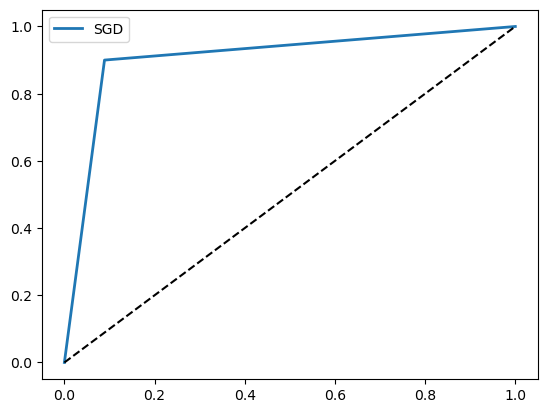

In [142]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_processed = [1 if label =="spam" else 0 for label in y_pred]
y_test_processed = [1 if label=="spam" else 0 for label in y_test]

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test_processed, y_pred_processed)

def plot_roc_curve(fpr = fpr, tpr = tpr, label = "SGD"):
    plt.plot(fpr,tpr,linewidth=2, label = label)
    plt.plot([0,1], [0,1], "k--")

plot_roc_curve(fpr_sgd,tpr_sgd)
plt.legend()
plt.show()

In [163]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()
clf_svc.fit(X_train_transformed, y_train)
y_pred_svc = clf_svc.predict(X_test_transformed)

In [164]:
y_pred_svc_processed = [1 if label =="spam" else 0 for label in y_pred_svc]

In [165]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train_transformed, y_train)
y_pred_tree = clf_svc.predict(X_test_transformed)
y_pred_tree_processed = [1 if label =="spam" else 0 for label in y_pred_tree]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test_processed, y_pred_tree_processed)


In [166]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test_processed, y_pred_svc_processed)


In [167]:
from sklearn.svm import SVC
clfsvc = SVC()
clfsvc.fit(X_train_transformed, y_train)
y_predsvc = clfsvc.predict(X_test_transformed)
y_pred_svcprocessed = [1 if label =="spam" else 0 for label in y_pred_svc]
fprsvc, tprsvc, thresholdssvc = roc_curve(y_test_processed, y_pred_svcprocessed)


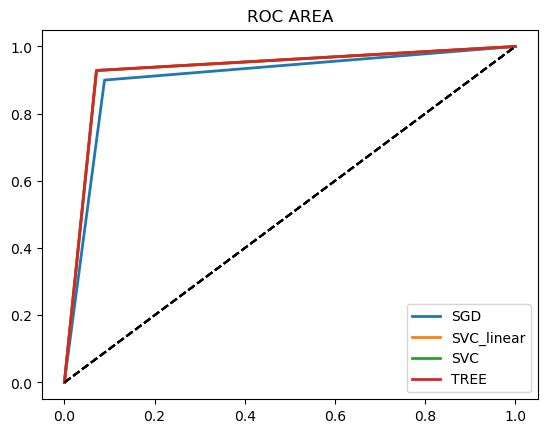

In [168]:
plot_roc_curve(fpr_sgd,tpr_sgd)
plot_roc_curve(fpr_svc,tpr_svc, label ="SVC_linear")
plot_roc_curve(fprsvc,tprsvc, label ="SVC")
plot_roc_curve(fpr_tree,tpr_tree, label ="TREE")
plt.legend()
plt.title("ROC AREA")
plt.show()

In [153]:
accuracy_score(y_pred_tree, y_test)

0.928698752228164

In [154]:
accuracy_score(y_pred_svc, y_test)

0.928698752228164

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    "kernel": ["rbf", "linear", "poly"],
    "C": [1,10],
    "degree" : [2,3,4],
    "verbose" : [True]
}

model_clf = GridSearchCV(SVC(), param_grid,cv = 3, scoring ="accuracy" , verbose = 3)

In [159]:
model_clf.fit(X_train_transformed,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LibSVM][CV 1/3] END C=1, degree=2, kernel=rbf, verbose=True;, score=0.985 total time=   3.1s
[LibSVM][CV 2/3] END C=1, degree=2, kernel=rbf, verbose=True;, score=0.972 total time=   3.1s
[LibSVM][CV 3/3] END C=1, degree=2, kernel=rbf, verbose=True;, score=0.977 total time=   3.0s
[LibSVM][CV 1/3] END C=1, degree=2, kernel=linear, verbose=True;, score=0.995 total time=   1.3s
[LibSVM][CV 2/3] END C=1, degree=2, kernel=linear, verbose=True;, score=0.995 total time=   1.2s
[LibSVM][CV 3/3] END C=1, degree=2, kernel=linear, verbose=True;, score=0.989 total time=   1.1s
[LibSVM][CV 1/3] END C=1, degree=2, kernel=poly, verbose=True;, score=0.985 total time=   7.0s
[LibSVM][CV 2/3] END C=1, degree=2, kernel=poly, verbose=True;, score=0.971 total time=   3.3s
[LibSVM][CV 3/3] END C=1, degree=2, kernel=poly, verbose=True;, score=0.972 total time=   3.1s
[LibSVM][CV 1/3] END C=1, degree=3, kernel=rbf, verbose=True;, score=0.985 total 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10], 'degree': [2, 3, 4],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'verbose': [True]},
             scoring='accuracy', verbose=3)

In [160]:
best_svm = model_clf.best_estimator_
y_pred = best_svm.predict(X_test_transformed)
print("Accuracy :")
print(accuracy_score(y_test, y_pred))

Accuracy :
0.9215686274509803


In [169]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[259  22]
 [ 22 258]]


In [170]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.92      0.92      0.92       281
        spam       0.92      0.92      0.92       280

    accuracy                           0.92       561
   macro avg       0.92      0.92      0.92       561
weighted avg       0.92      0.92      0.92       561

